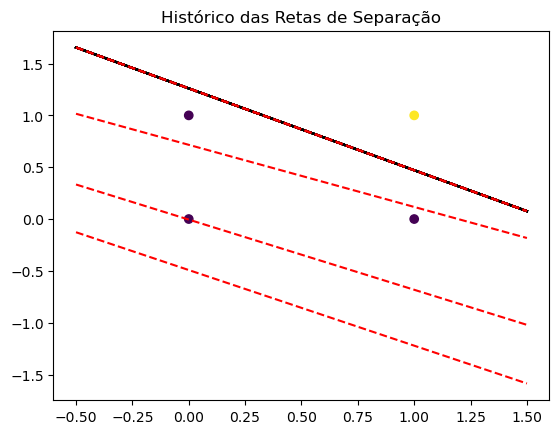

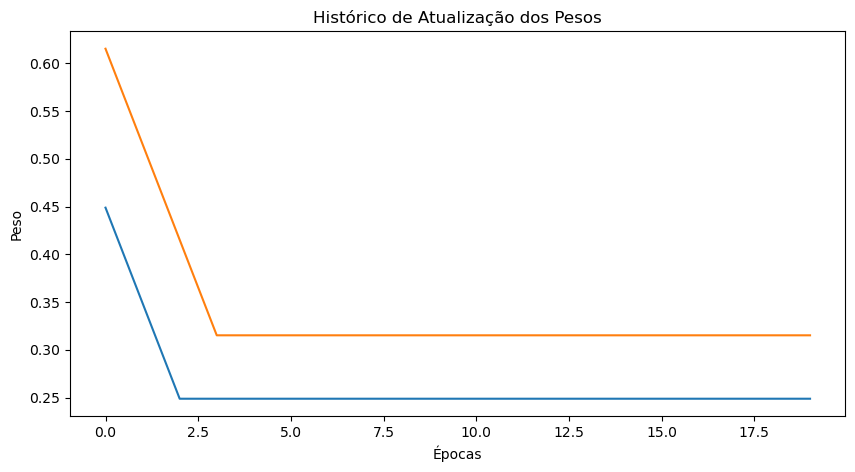

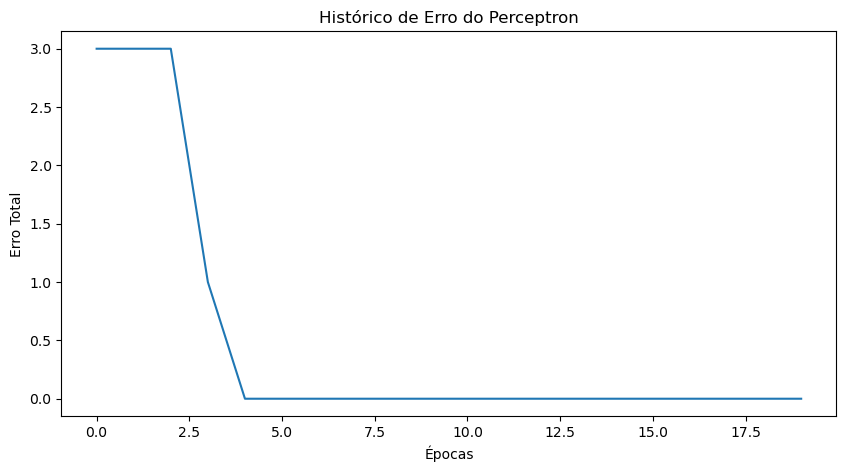

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def limiar(x):
    return np.where(x < 0, 0, 1)
    
def limiar_partes(x):
    if x >= 1/2:
        return 1/2
    elif x <= -1/2:
        return -1/2
    else:
        return x

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def perceptron(X, y, learning_rate=0.1, epochs=20):
    # Inicialização dos pesos e bias
    # print(X)
    np.random.seed(0)
    weights = np.random.rand(X.shape[1])
    # print(weights)
    bias = np.random.rand(1)
    # print(bias)
    
    # Listas para armazenar o histórico de erros e histórico de pesos
    errors = []
    weights_history = []
    
    # Treinamento do perceptron
    for epoch in range(epochs):
        total_error = 0
        # total_epochs = 0
        for i in range(X.shape[0]):
            # Cálculo do output
            output = limiar(np.dot(X[i], weights) + bias)
            #print(output)
            # Cálculo do erro
            error = y[i] - output
            #print(error)
            # Atualização dos pesos e bias
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            # Acumulação do erro total
            total_error += np.abs(error)
            # print(total_error)
        # Armazenamento do erro total da época atual
        errors.append(total_error)
        weights_history.append(weights.copy())
        
        # Plotando a reta de separação
        x_vals = np.linspace(-0.5, 1.5, 50)
        y_vals = -(weights[0]*x_vals + bias) / weights[1]
        
        if total_error == 0:
            plt.plot(x_vals, y_vals, 'k')
        
        plt.plot(x_vals, y_vals, 'r--')
        plt.title('Histórico das Retas de Separação')
    
    return weights, bias, errors, weights_history

def plot_perceptron_training(X, y, weights, bias, errors, weights_history):
    # Plotando os pontos de dados
    plt.scatter(X[:,0], X[:,1], c=y)

    # Plotando a atualização dos pesos
    plt.figure(figsize=(10, 5))
    plt.plot(weights_history)
    plt.xlabel('Épocas')
    plt.ylabel('Peso')
    plt.title('Histórico de Atualização dos Pesos')
    plt.show()
    
    # Plotando a atualização do erro
    plt.figure(figsize=(10, 5))
    plt.plot(errors)
    plt.xlabel('Épocas')
    plt.ylabel('Erro Total')
    plt.title('Histórico de Erro do Perceptron')
    plt.show()

    

# Dados de entrada para o operador AND
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Saída esperada para o operador AND
y = np.array([0, 0, 0, 1])

# Treinamento do perceptron
weights, bias, errors, weights_history = perceptron(X, y)

# Plotando o resultado do treinamento
plot_perceptron_training(X, y, weights, bias, errors, weights_history)
